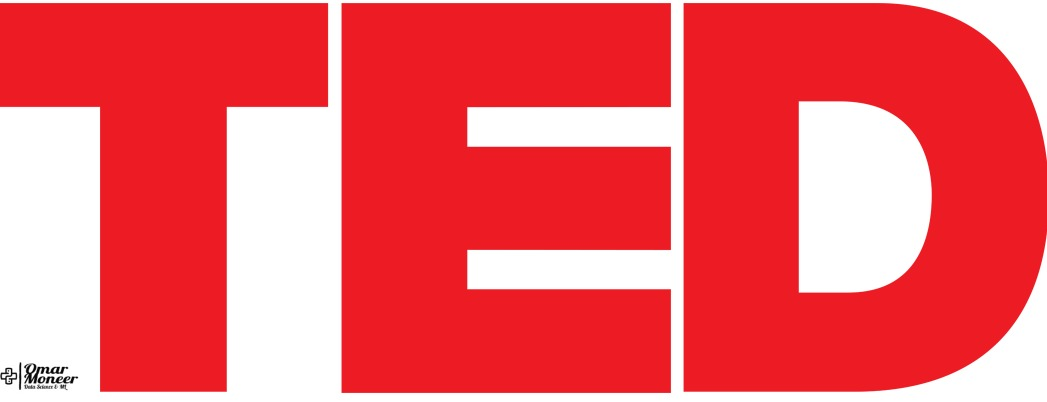

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing the important libraries that we will use in this analysis process

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.offline as pyoff
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Reading the used data in the analysis and knowing the structure of the data

In [3]:
tedk = pd.read_csv('/kaggle/input/ted-talks/data.csv')
tedk.info()
tedk.head()

In [4]:
tedk.nunique()

In [5]:
tedk.head()

## Dropping any missing data

In [6]:
tedk.dropna(inplace=True)
tedk.info()

### Splitting the month from the year in the [date] column

In [7]:
month = []
year = []

for date in tedk['date']:
    month.append(date.split()[0])
    year.append(date.split()[1])
tedk['month'] = month
tedk['year'] = year

### 1st finding: Knowing the most popular talk 

In [8]:
tedk.sort_values(by='views',ascending=False).head()
#another way yo get the same output : tedk[tedk['views']==tedk['views'].max()]

### 2nd finding: Find the ratio of likes to views to know the ratio of people that liked the talk after the view and how the CTA method affect the speople 

In [9]:
tedk['reach'] = (tedk['likes']/tedk['views']) *100

In [10]:
tedk.sort_values(by='reach',ascending=False)
tedk.head()

### We can find the change in the views, number of the talks, and the year 
#### We will find that 2015 is the year with the biggest number of views

In [11]:
ted_date = tedk[['author','year','views']]
ted_date.count()
td =pd.pivot_table(ted_date,values=['author','views'],columns=['year'],aggfunc={'author':len,'views':np.sum})
td

## Knowing the number of the talks of each author

### 3rd finding: the authors that made more than 10 talks

In [12]:
tedk['author'].value_counts().head(8)

## Make the data only have the numeric data to make mathematical operations on it 

In [13]:
talk_count=tedk['author'].value_counts().reset_index()
talk_count.columns = ['author', 'count']
talk_count

### 4th finding: The total views and likes

In [15]:
tot = tedk.groupby(by='author')[['views','likes']].sum().sort_values(by='likes',ascending=False)
tot['reach']=(tot['likes']/tot['views'])*100
tot['likes_million']=tot['likes']/1000000
tot['views_million']=tot['views']/1000000
tot.drop(labels=['views','likes'],axis=1,inplace=True)
total= tot.merge(talk_count,on='author')
total

In [16]:
fig = px.pie(total.head(10), values='count', names='author', title='The contribution of each author in spreading ideas')
fig.show()

### 5th finding: The average of the views of each author and the biggest 10 authors of number of the views per one talk

In [17]:
total['avg_views_for_author']=total['views_million']/total['count']
total.sort_values(by=['avg_views_for_author'],ascending=False).head(10)

### 6th Finding: The trend of the total views along the talks of the most frequent author alnog his/her whole number of talks 
#### Alex Gendler

In [18]:
Alex_G=tedk[tedk['author']=='Alex Gendler']

In [32]:
tedk_ser = go.Scatter(x=Alex_G['date'],
                         y=Alex_G['views'].values, marker = {'color' : 'red'})

In [33]:
layout = go.Layout(title='views', xaxis=dict(title='date'),
                   yaxis=dict(title='views'))

In [34]:
fig = go.Figure(data=[tedk_ser], layout=layout)
pyoff.iplot(fig)

### 7th finding: The most watched talk of the most frequent author 

In [22]:
Alex_G[Alex_G['views']==Alex_G['views'].max()]

In [40]:
fig = px.line(Alex_G, x='views', y=Alex_G.title)
fig.update_traces(line_color='#e62b1e')
fig.show()

In [24]:
tedk['year']=tedk['year'].astype('int64')
tedk.info()

In [25]:
yr_talks=tedk.groupby(by='year')['author'].value_counts()
yr_talks=yr_talks.to_frame()

### 8th finding: The most author comes to ted platform within one year

In [26]:
yr_talks[yr_talks['author']==yr_talks['author'].max()]

### 9th Finding: Finding the author with biggest number of views ever 

In [50]:
fig = px.scatter(tedk, x=tedk.author, y='views',color_discrete_sequence = ['#e62b1e'])
fig.show()